<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Analisis de comportmiento de Uso del Oxigeno en Siderca***


---





In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image


### ***Esquema de flujo Praxair _ Siderca:***

---



Mounted at /content/drive


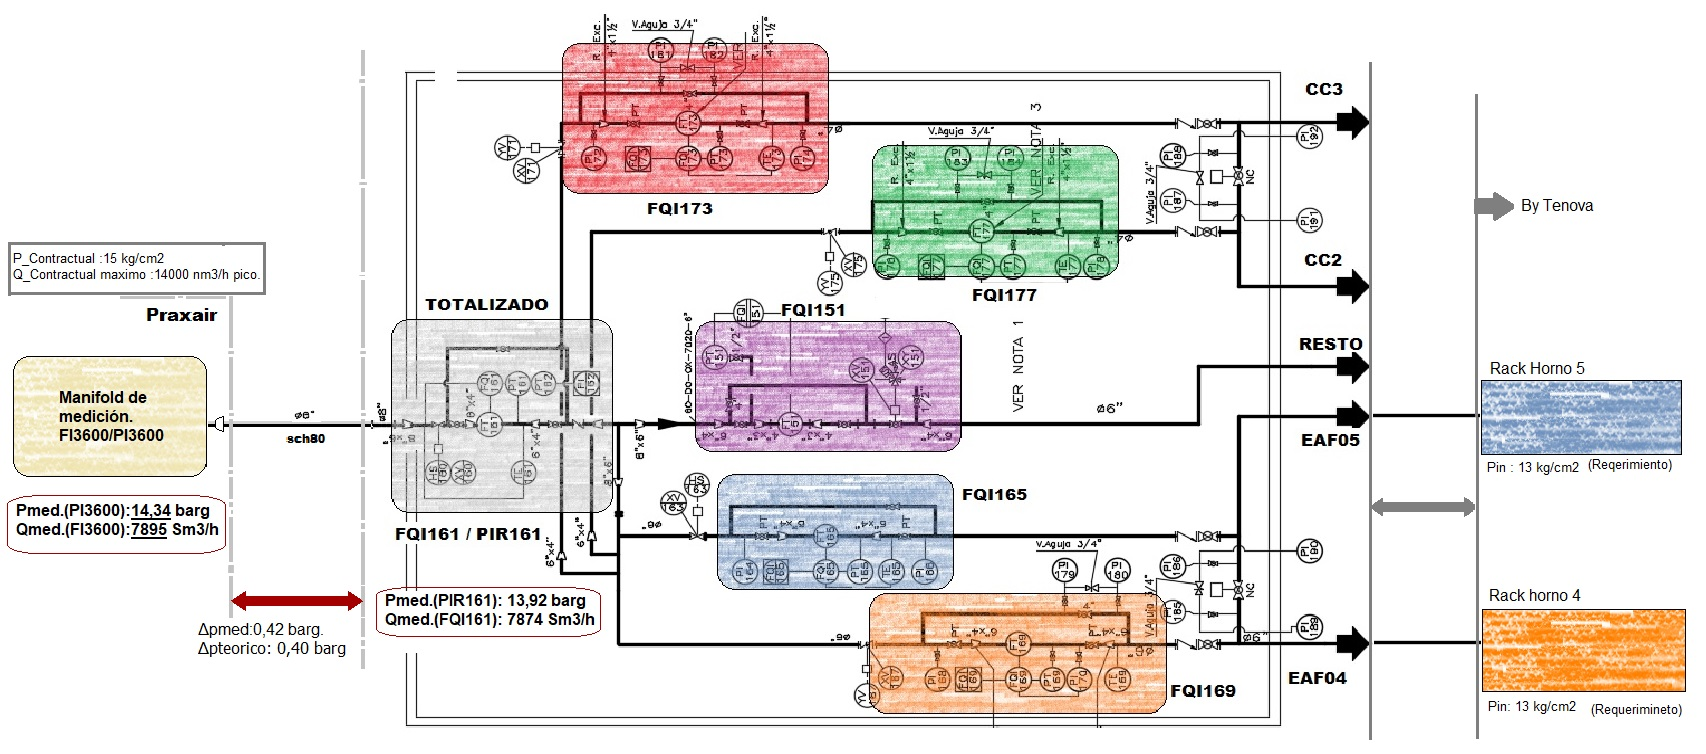

In [ ]:
#@title "Ejecutar para recargar imagen"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Image('/content/drive/MyDrive/Colab Notebooks/ESQUEMA ENTRADA.jpg')

## ***Carga de datos y analisis rapidos***

---



In [2]:
#@title "Ejecutar Celda"
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/MUESTRA%20TOTAL%201122.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  
for i in range (len(dfx['FQI151'])):
     if (dfx['FQI151'].values[i])<=0:
         dfx['FQI151'].values[i]=0

    

         #print(dfx['FQI151'].values[i])
#print(dfx.loc[dfx['FQI151']==0])
#print(dfx)

In [3]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI161.describe(),2))
b=np.array(round(dfx.PIR161.describe(),2))
c=np.array(round(dfx.FQI165.describe(),2))
d=np.array(round(dfx.FQI169.describe(),2))
e=np.array(round(dfx.FQI177.describe(),2))
f=np.array(round(dfx.FQI173.describe(),2))
g=np.array(round(dfx.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )
TABLA1(dfD)
#@title Maximos y minimos de intervalo dado:
nvalue = 4 #@param {type:"number"}
Instrumento = 'FQI161' #@param {type:"raw"}
dfx = dfx #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)
dfmax

Analisis rapidos.


indice       Date                Time    FQI161  PIR161   FQI165  \
2815    2816  11/3/2022  11/3/2022 22:22:29  14076.57   12.63  6362.58   
3377    3378  11/4/2022  11/4/2022 22:22:54  14056.15   12.63  6362.50   
2816    2817  11/3/2022  11/3/2022 22:23:59  14005.17   12.63  6359.60   
1866    1867  11/2/2022  11/2/2022 22:38:59  14003.71   12.72  6368.00   

       FQI169  FQI177  FQI173   FQI151  
2815  4983.89  204.65  161.33  2364.12  
3377  4986.33  158.94  149.67  2398.71  
2816  4990.43  132.47  124.56  2398.11  
1866  5007.70   75.85  126.30  2425.86

## ***Analisis de la dispersión CAUDAL VS PRESION en instrumentos de entreda (FQI161/PIR161)***

---



Cantidad de items sampleados:  14400
Fecha de la muestra:  11/1/2022 al 11/15/2022
Muestreo cada 1 minuto 30 seg 


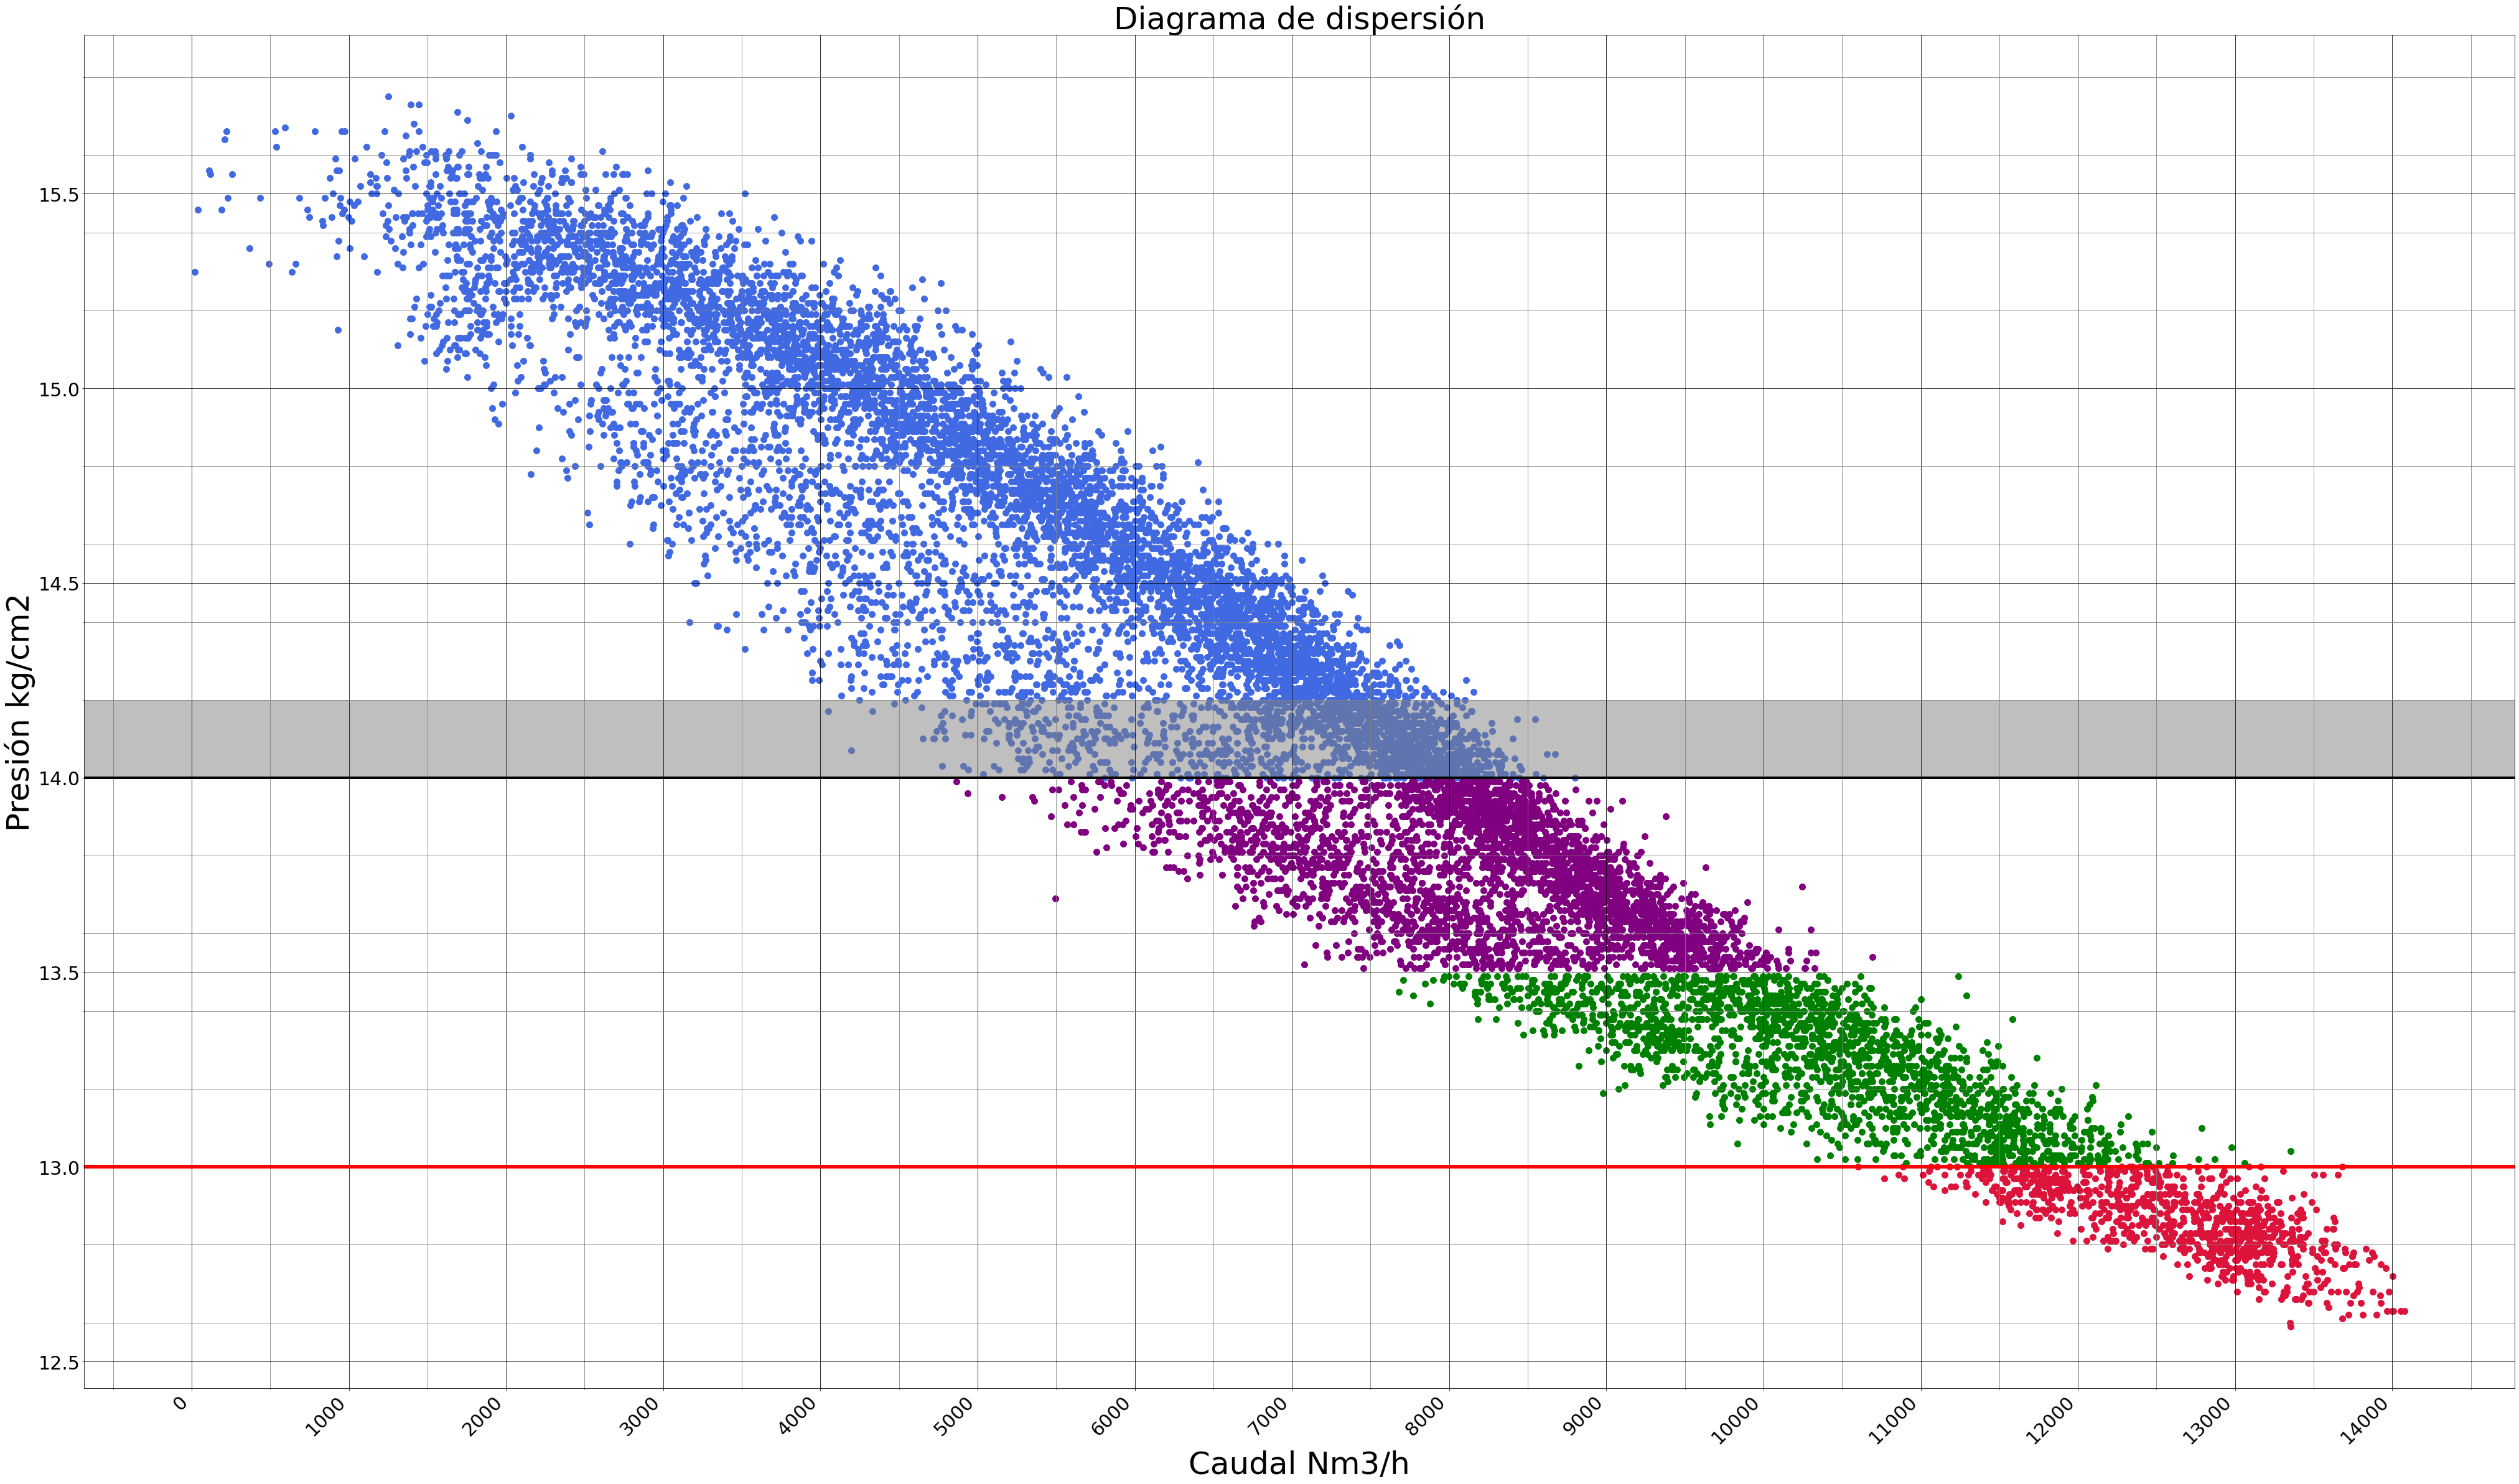

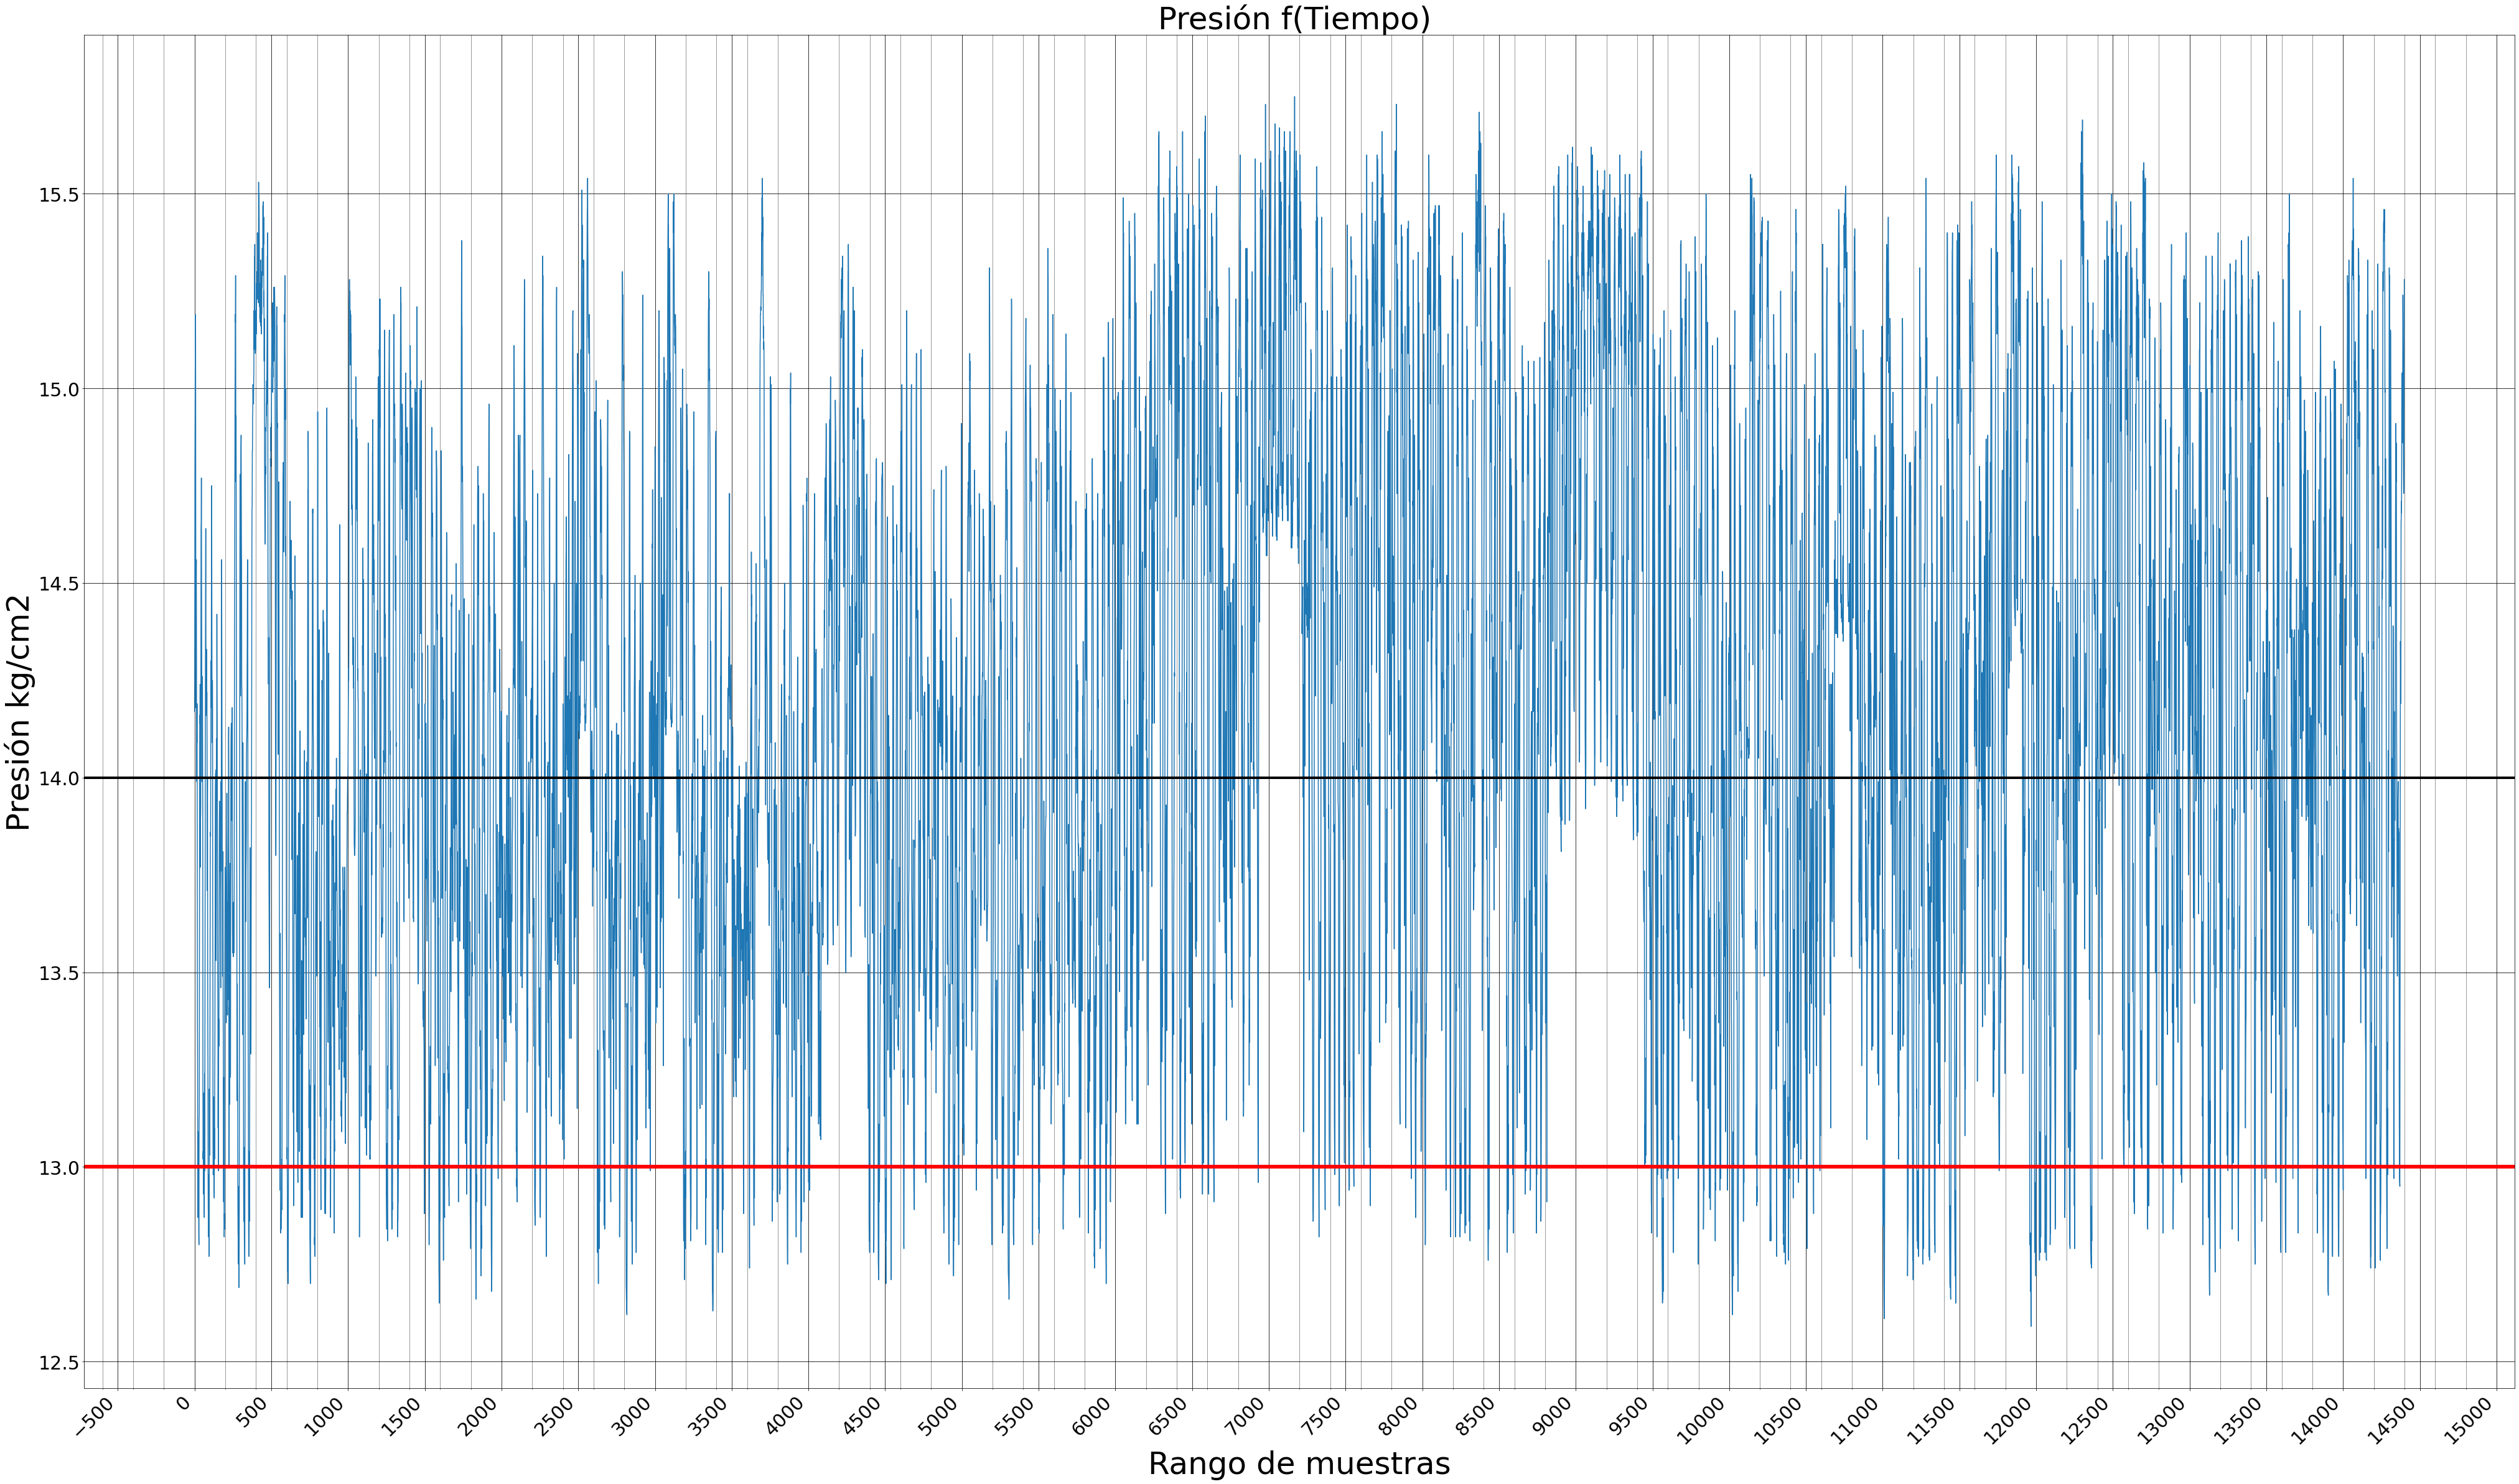

In [4]:
from pandas.core.aggregation import reconstruct_func
from io import DEFAULT_BUFFER_SIZE
#@title Seleccionar parametros y ejecuar celda

#Time=np.array((0,len(dfx.index)))
#np.array(dfx.Date.values+' '+str(dfx.hour.values))#+':'+str(dfx.minute.values)+':'+str(dfx.second.values))

InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = 'FQI161' #@param {type:"raw"}
y = 'PIR161' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
choice=False
Secciones = "13;13.5;14" #@param {type:"string"}
zoom = True
Intervalo = "14;14.2" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])
print('Muestreo cada 1 minuto 30 seg ')

#------------------FIGURA 1
fig1, ax = plt.subplots(1, figsize=(70,40))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]

ax.set_xlabel(text,fontsize=50)
ax.set_ylabel(text1,fontsize=50)

ax.scatter(dfa[x],dfa[y],color='crimson',s=100,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=100,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=100,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=100,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
  ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')
    
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=50)
ax.axhline(y=14,linewidth=4,color='black')
ax.axhline(y=13,linewidth=6,color='red')

#------------------figura 2
figB, (ax1)= plt.subplots(1, figsize=(70,40))
ax1.plot(dfx.index,dfx['PIR161'])
ax1.set_title('Presión f(Tiempo) ',fontsize=50)
ax1.set_xlabel(text2,fontsize=50)
ax1.set_ylabel(text1,fontsize=50)
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.axhline(y=14,linewidth=4,color='black')
ax1.axhline(y=13,linewidth=6,color='red')
labels2 = ax1.get_xticklabels()
labels3= ax1.get_yticklabels()
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels3,fontsize=30, horizontalalignment='right')
ax1.axes.grid(True, which='minor',color='grey',axis='both')
ax1.axes.grid(True, which='major',color='black',axis='both')

plt.show()



## ***Curvas de Caudal en intervalos diarios y parciales:***

---



Cantidad de items sampleados:  960
Fecha de la muestra:  11/3/2022 0:00:00 al 11/3/2022 23:58:29
sampleo cada 1 min 30 seg


indice       Date                Time    FQI161  PIR161   FQI165  \
2815    2816  11/3/2022  11/3/2022 22:22:29  14076.57   12.63  6362.58   

       FQI169  FQI177  FQI173   FQI151  
2815  4983.89  204.65  161.33  2364.12

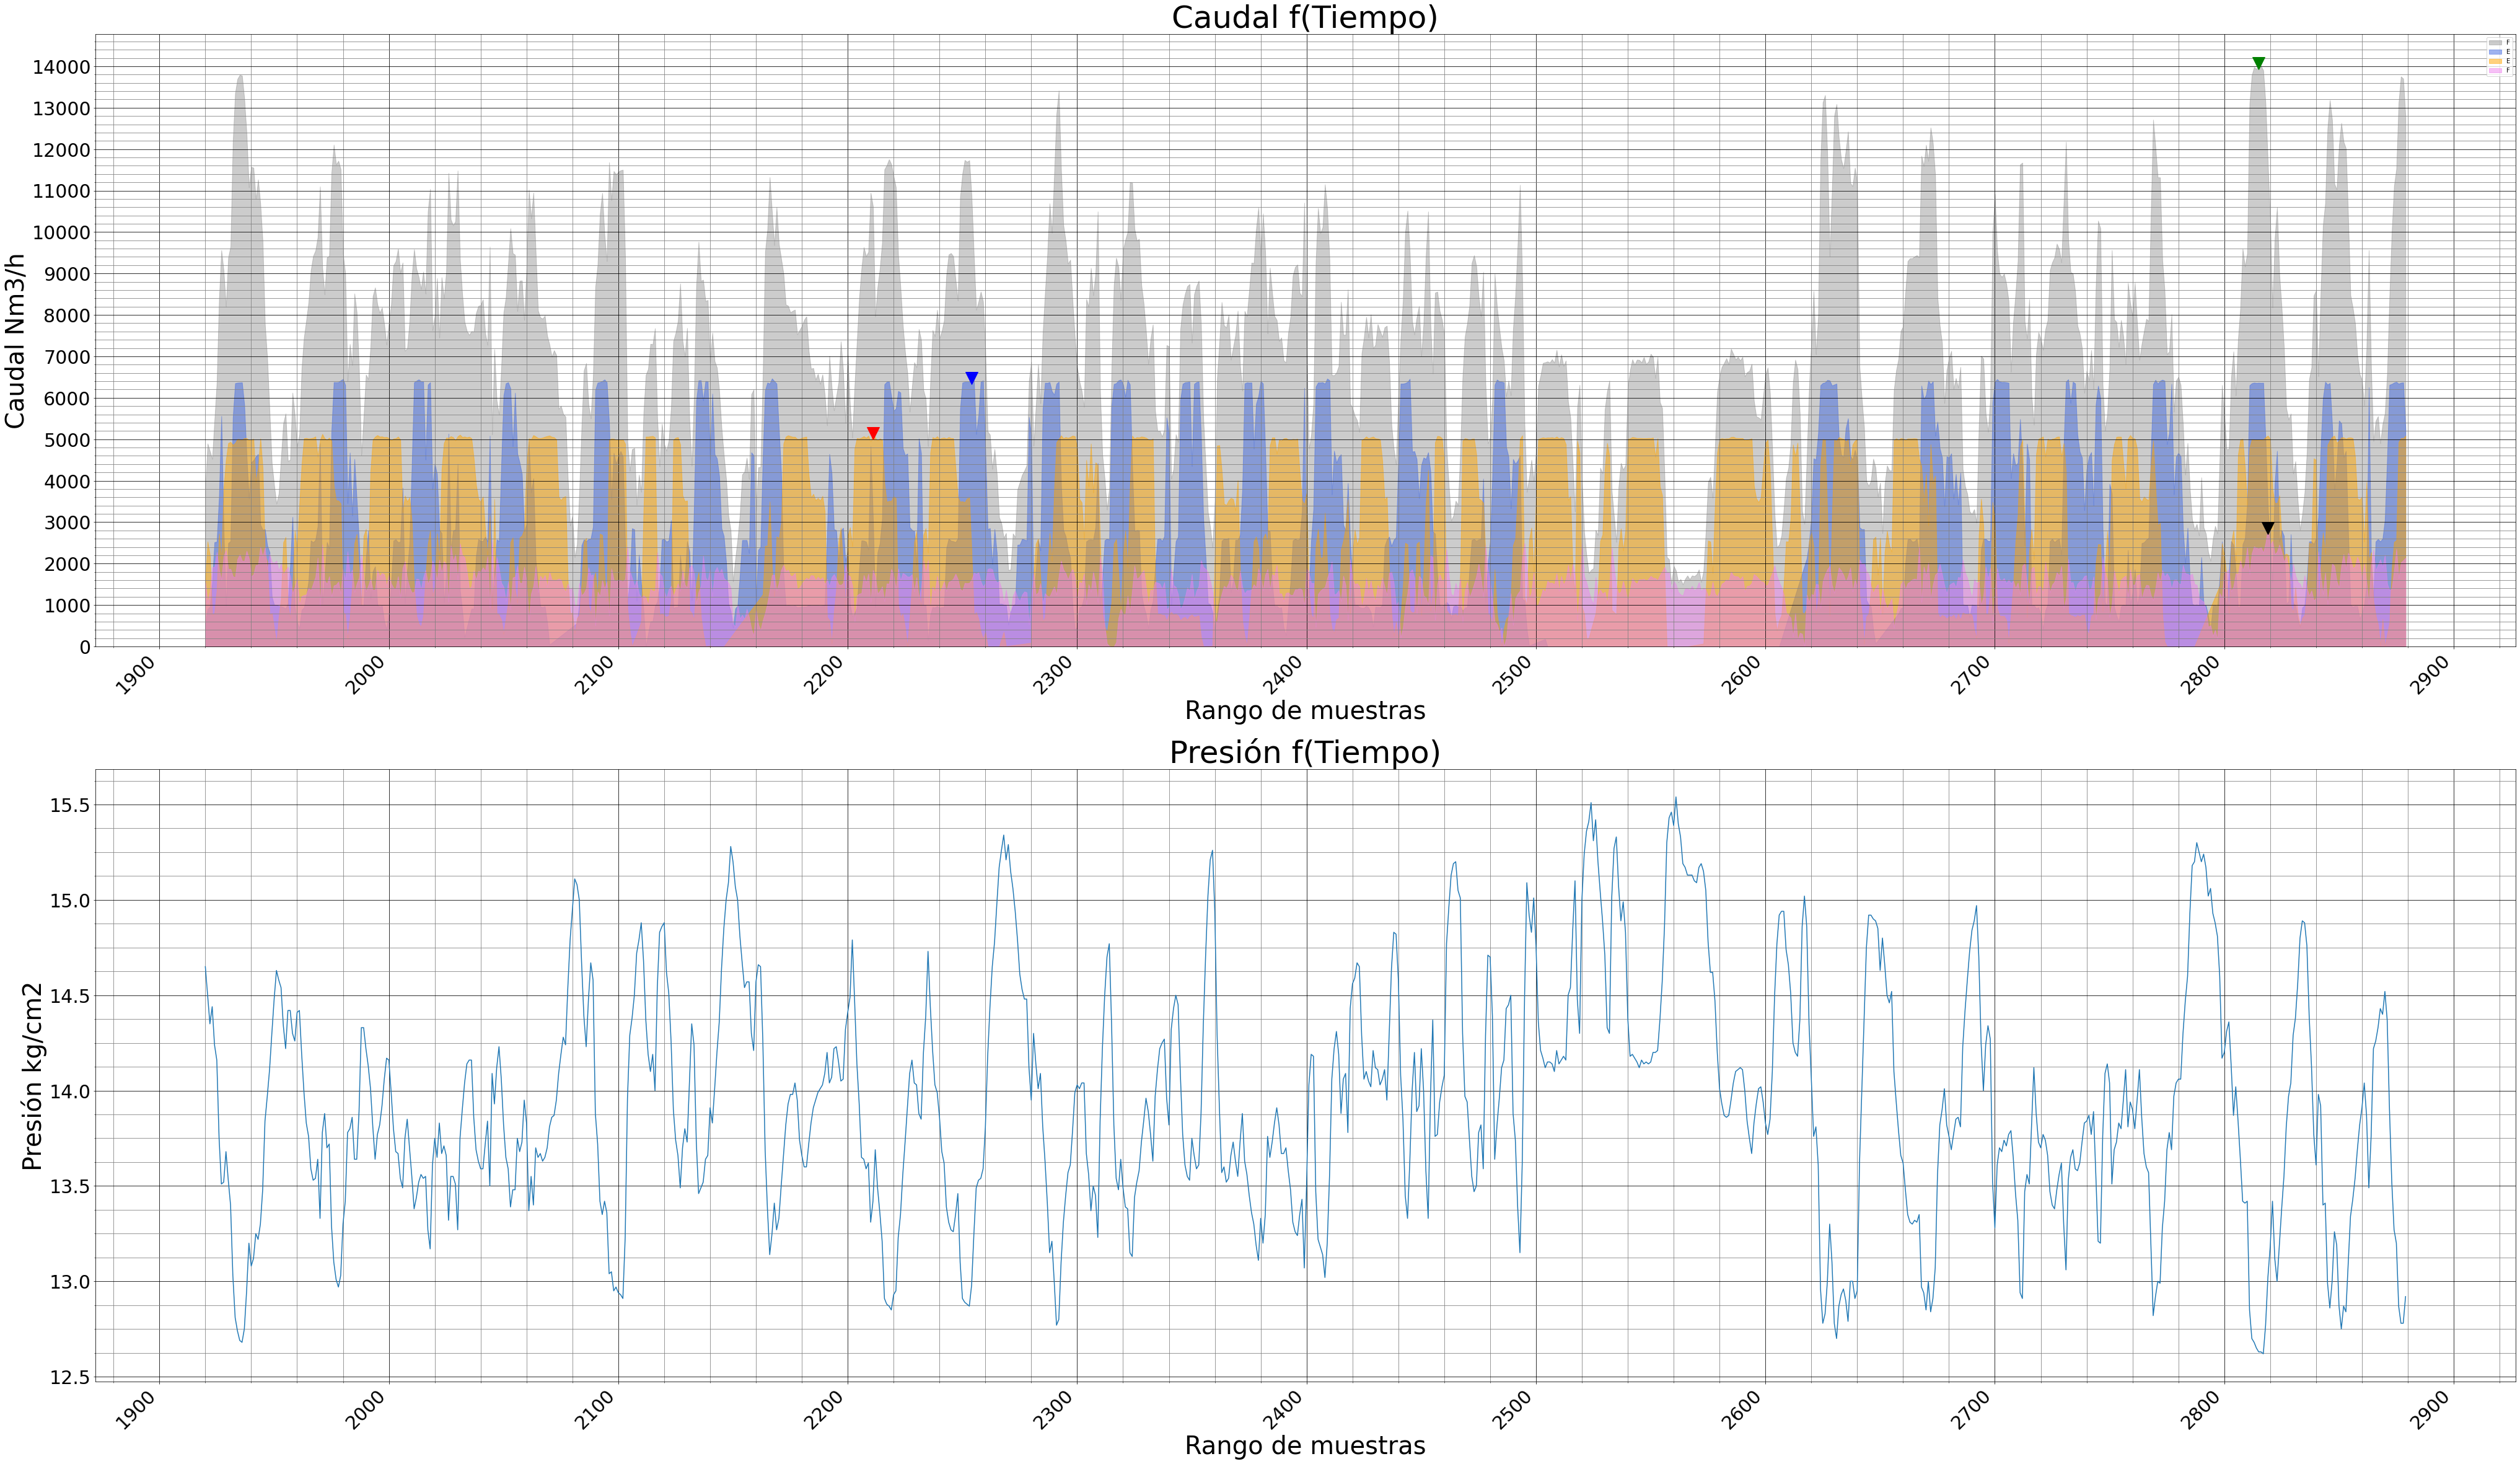

In [14]:
#@title "Ejecutar Celda"
dfs=dfx.copy()

Celda = 'Date' #@param {type:"raw"}
Dia = '11/3/2022' #@param {type:"raw"}
Total = False
Aux1=dfs.loc[dfs.loc[:,Celda]==Dia]

print('Cantidad de items sampleados: ', len(Aux1.index))
print('Fecha de la muestra: ',Aux1.Time.values[0], 'al',Aux1.Time.values[(len(Aux1.index)-1)])
print('sampleo cada 1 min 30 seg')

#_________________________________________________________________________________________

figB, (ax,ax1)= plt.subplots(2,1, figsize=(70,40))
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
#------- scatter

ax.set_title('Caudal f(Tiempo)',fontsize=50)
ax.set_xlabel(text2,fontsize=40)
ax.set_ylabel(text,fontsize=40)
ax.stackplot(Aux1.index,Aux1['FQI161'],alpha=0.4,color='grey',labels="FQI161")
ax.stackplot(Aux1.index,Aux1['FQI165'],alpha=0.5,color='royalblue',labels="EAF5")
ax.stackplot(Aux1.index,Aux1['FQI169'],alpha=0.5,color='orange',labels="EAF4")
ax.stackplot(Aux1.index,Aux1['FQI151'],alpha=0.5,color='violet',labels="FQI151")
labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels()

plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(200),)
ax.xaxis.set_major_locator(MultipleLocator(100),)
ax.xaxis.set_minor_locator(MultipleLocator(20),)

ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax.axes.grid(True, which='minor',color='grey',axis='x')
ax.axes.grid(True, which='major',color='black',axis='x')
Maximo=Aux1.nlargest(1,'FQI161')
ax.plot(Maximo.index,Maximo.FQI161, 'v',markersize=20, color='g')

Max5=Aux1.nlargest(1,'FQI165')
Max4=Aux1.nlargest(1,'FQI169')
Max6=Aux1.nlargest(1,'FQI151')
ax.plot(Max4.index,Max4.FQI169, 'v',markersize=20, color='r')
ax.plot(Max5.index,Max5.FQI165, 'v',markersize=20, color='b')
ax.plot(Max6.index,Max6.FQI151, 'v',markersize=20, color='black')

#----- Plot
ax1.set_title('Presión f(Tiempo)',fontsize=50)
ax1.set_xlabel(text2,fontsize=40)
ax1.set_ylabel(text1,fontsize=40)
ax1.plot(Aux1.index,Aux1['PIR161']) # Grafica
labels = ax1.get_xticklabels()
labels3 = ax1.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')

ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
ax1.axes.grid(True, which='minor',color='grey',axis='y')
ax1.axes.grid(True, which='major',color='black',axis='y')
ax1.axes.grid(True, which='minor',color='grey',axis='x')
ax1.axes.grid(True, which='major',color='black',axis='x')
ax1.xaxis.set_major_locator(MultipleLocator(100),)
ax1.xaxis.set_minor_locator(MultipleLocator(20),)

plt.setp(labels3,fontsize=30, horizontalalignment='right')
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')

ax.legend(fontsize=10)
figB.show()
Maximo


Cantidad de items sampleados:  59 (muestra N°: 2775 a muestra N°: 2833 )
Fecha de la muestra:  11/3/2022 21:22:29 al 11/3/2022 22:49:29
sampleo cada 1 min 30 seg


indice       Date                Time    FQI161  PIR161   FQI165  \
2775    2776  11/3/2022  11/3/2022 21:22:29   7051.06   13.69  4881.13   
2776    2777  11/3/2022  11/3/2022 21:23:59   7120.87   13.78  5149.25   
2777    2778  11/3/2022  11/3/2022 21:25:29   8016.69   13.69  6337.00   
2778    2779  11/3/2022  11/3/2022 21:26:59   5665.12   13.97  3670.87   
2779    2780  11/3/2022  11/3/2022 21:28:29   6415.38   14.04  4583.27   
2780    2781  11/3/2022  11/3/2022 21:29:59   6507.57   14.06  4669.25   
2781    2782  11/3/2022  11/3/2022 21:31:29   6307.83   14.06  4590.21   
2782    2783  11/3/2022  11/3/2022 21:32:59   5333.81   14.30  2820.93   
2783    2784  11/3/2022  11/3/2022 21:34:29   4145.50   14.47  2014.62   
2784    2785  11/3/2022  11/3/2022 21:35:59   4911.33   14.60  2860.75   
2785    2786  11/3/2022  11/3/2022 21:37:29   3802.65   14.93  1613.82   
2786    2787  11/3/2022  11/3/2022 21:38:59   3064.17   15.18  1027.14   
2787    2788  11/3/2022  11/3/2022 21:40:29   2826.07   15.20  1002.25   
2788    2789  11/3/2022  11/3/2022 21:41:59   2957.00   15.30  1013.64   
2789    2790  11/3/2022  11/3/2022 21:43:29   2682.61   15.25   987.75   
2790    2791  11/3/2022  11/3/2022 21:44:59   4079.18   15.20  2155.07   
2791    2792  11/3/2022  11/3/2022 21:46:29   2871.19   15.24  1006.45   
2792    2793  11/3/2022  11/3/2022 21:47:59   2719.46   15.17   988.18   
2793    2794  11/3/2022  11/3/2022 21:49:29   2279.13   15.02   737.50   
2794    2795  11/3/2022  11/3/2022 21:50:59   2069.65   15.06   387.00   
2795    2796  11/3/2022  11/3/2022 21:52:29   2581.71   14.93   981.80   
2796    2797  11/3/2022  11/3/2022 21:53:59   2908.54   14.88   986.63   
2797    2798  11/3/2022  11/3/2022 21:55:29   2728.94   14.81   970.54   
2798    2799  11/3/2022  11/3/2022 21:56:59   4549.78   14.60  1663.00   
2799    2800  11/3/2022  11/3/2022 21:58:29   6307.31   14.17  2532.57   
2800    2801  11/3/2022  11/3/2022 21:59:59   5582.82   14.20  1270.53   
2801    2802  11/3/2022  11/3/2022 22:01:29   4756.63   14.31   994.41   
2802    2803  11/3/2022  11/3/2022 22:02:59   4769.06   14.36  1782.22   
2803    2804  11/3/2022  11/3/2022 22:04:29   6497.00   14.13  2542.33   
2804    2805  11/3/2022  11/3/2022 22:05:59   7118.65   13.87  2454.71   
2805    2806  11/3/2022  11/3/2022 22:07:29   6057.82   14.02  1815.56   
2806    2807  11/3/2022  11/3/2022 22:08:59   7405.12   13.84   926.77   
2807    2808  11/3/2022  11/3/2022 22:10:29   8168.76   13.64   993.27   
2808    2809  11/3/2022  11/3/2022 22:11:59   9596.69   13.42  2466.00   
2809    2810  11/3/2022  11/3/2022 22:13:29   9171.13   13.41  2604.82   
2810    2811  11/3/2022  11/3/2022 22:14:59   9484.82   13.42  3444.19   
2811    2812  11/3/2022  11/3/2022 22:16:29  13084.06   12.85  6301.73   
2812    2813  11/3/2022  11/3/2022 22:17:59  13785.31   12.70  6350.12   
2813    2814  11/3/2022  11/3/2022 22:19:29  13978.57   12.68  6365.93   
2814    2815  11/3/2022  11/3/2022 22:20:59  13928.63   12.65  6357.83   
2815    2816  11/3/2022  11/3/2022 22:22:29  14076.57   12.63  6362.58   
2816    2817  11/3/2022  11/3/2022 22:23:59  14005.17   12.63  6359.60   
2817    2818  11/3/2022  11/3/2022 22:25:29  13901.08   12.62  6362.47   
2818    2819  11/3/2022  11/3/2022 22:26:59  13093.27   12.77  4963.94   
2819    2820  11/3/2022  11/3/2022 22:28:29  11652.94   13.02  3321.25   
2820    2821  11/3/2022  11/3/2022 22:29:59  10335.59   13.18  2565.35   
2821    2822  11/3/2022  11/3/2022 22:31:29   8179.06   13.42  1562.29   
2822    2823  11/3/2022  11/3/2022 22:32:59   9844.59   13.12  3934.06   
2823    2824  11/3/2022  11/3/2022 22:34:29  10603.36   13.00  4719.42   
2824    2825  11/3/2022  11/3/2022 22:35:59   8979.71   13.19  2528.25   
2825    2826  11/3/2022  11/3/2022 22:37:29   8181.93   13.38  2806.33   
2826    2827  11/3/2022  11/3/2022 22:38:59   7220.63   13.55  2667.14   
2827    2828  11/3/2022  11/3/2022 22:40:29   5756.33   13.81  1023.07   
2828    28

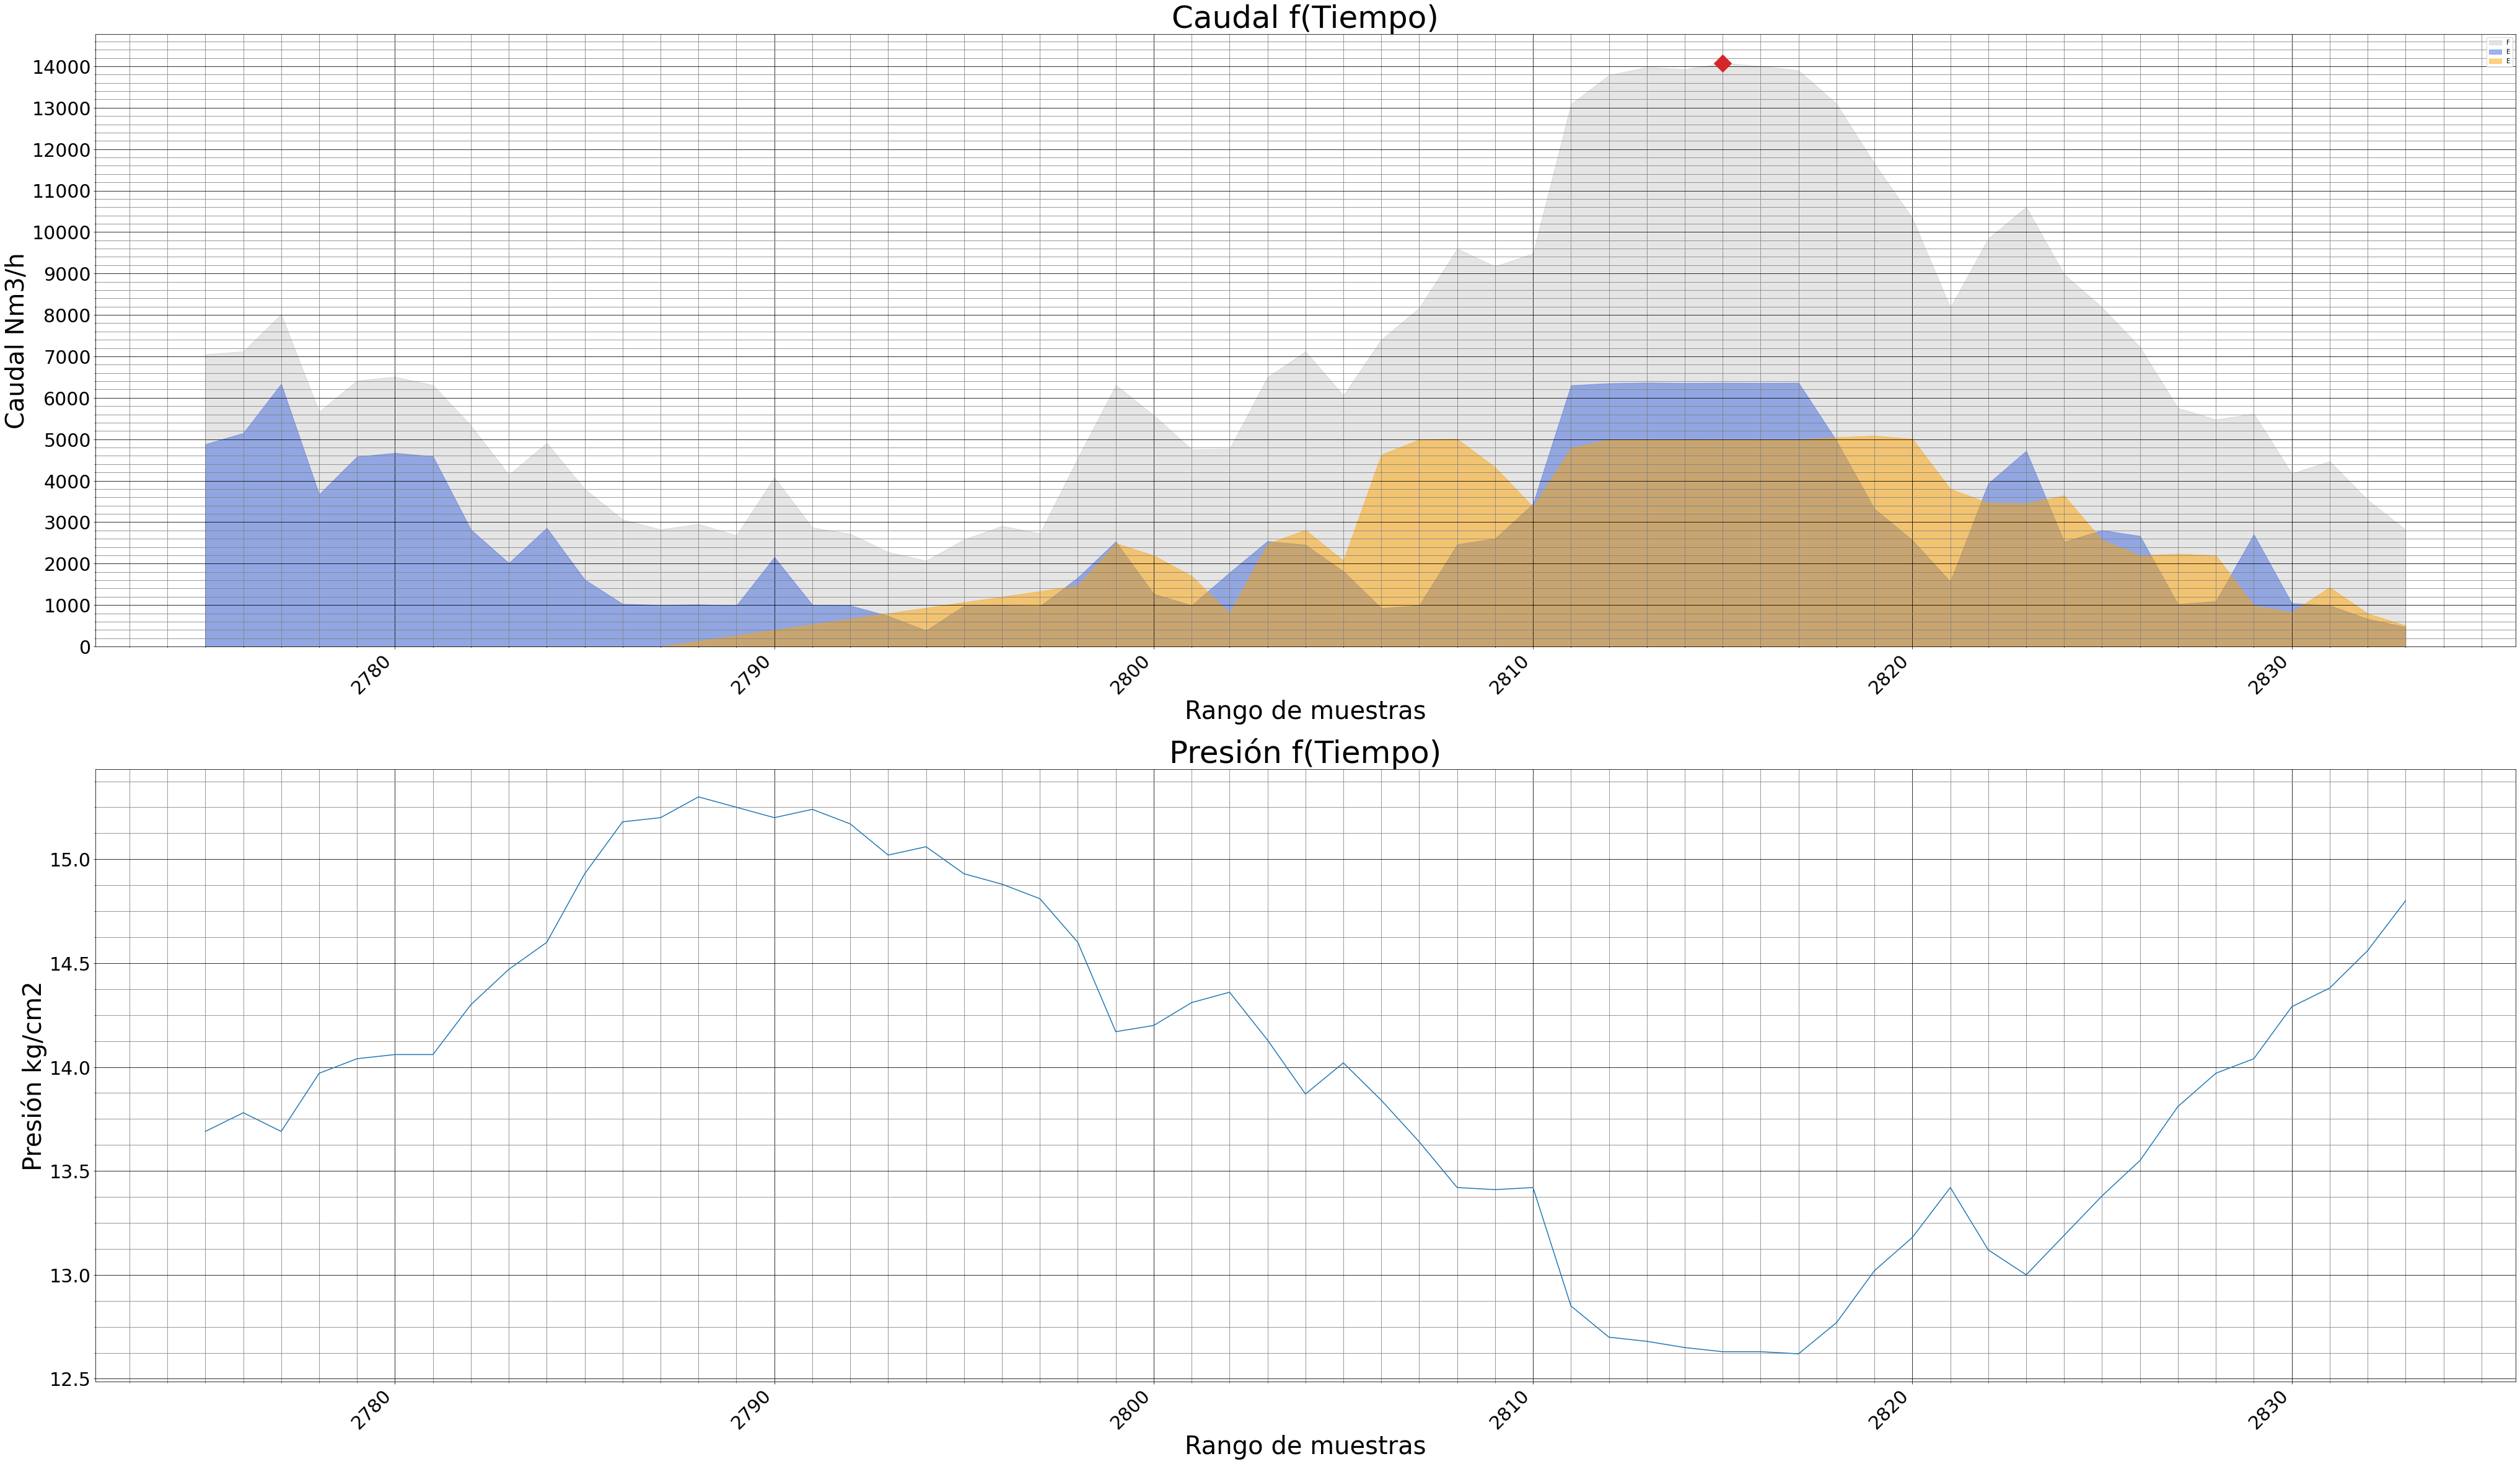

In [ ]:
from tables import index
#@title "Ejecutar Celda parcializada"
Aux2=Aux1.copy()
#@markdown Elegir rango de muestra:
Total = True #@param {type:"boolean"}
EAF5 = True #@param {type:"boolean"}
EAF4 = True #@param {type:"boolean"}
Resto = False #@param {type:"boolean"}
Start = 2775 #@param {type:"integer"}
Stop = 2833 #@param {type:"number"}

AUXs=Aux2.loc[Start:Stop]
print('Cantidad de items sampleados: ', len(AUXs.index),'(muestra N°:',AUXs.index.values[0],'a muestra N°:',AUXs.index.values[(len(AUXs.index)-1)],')')
print('Fecha de la muestra: ',AUXs.Time.values[0], 'al',AUXs.Time.values[(len(AUXs.index)-1)])
print('sampleo cada 1 min 30 seg')


#_________________________________________________________________________________________
figC, (ax,ax1)= plt.subplots(2,1, figsize=(70,40))
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
#------- scatter

ax.set_title('Caudal f(Tiempo)',fontsize=50)
ax.set_xlabel(text2,fontsize=40)
ax.set_ylabel(text,fontsize=40)
if Total== True:
   ax.stackplot(AUXs.index,AUXs['FQI161'],alpha=0.2,color='grey',labels="FQI161")
if EAF5== True:
   ax.stackplot(AUXs.index,AUXs['FQI165'],alpha=0.5,color='royalblue',labels="EAF5")
if EAF4== True:
   ax.stackplot(AUXs.index,AUXs['FQI169'],alpha=0.5,color='orange',labels="EAF4")
if Resto==True:
   ax.stackplot(AUXs.index,AUXs['FQI151'],alpha=0.5,color='violet',labels="FQI151")

labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels()

plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(200),)
ax.xaxis.set_major_locator(MultipleLocator(10),)
ax.xaxis.set_minor_locator(MultipleLocator(1),)

ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax.axes.grid(True, which='minor',color='grey',axis='x')
ax.axes.grid(True, which='major',color='black',axis='x')

#----- Plot
ax1.set_title('Presión f(Tiempo)',fontsize=50)
ax1.set_xlabel(text2,fontsize=40)
ax1.set_ylabel(text1,fontsize=40)
ax1.plot(AUXs.index,AUXs['PIR161']) # Grafica
labels = ax1.get_xticklabels()
labels3 = ax1.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')

ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
ax1.axes.grid(True, which='minor',color='grey',axis='y')
ax1.axes.grid(True, which='major',color='black',axis='y')
ax1.axes.grid(True, which='minor',color='grey',axis='x')
ax1.axes.grid(True, which='major',color='black',axis='x')
ax1.xaxis.set_major_locator(MultipleLocator(10),)
ax1.xaxis.set_minor_locator(MultipleLocator(1),)

plt.setp(labels3,fontsize=30, horizontalalignment='right')
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')

Maximo=AUXs.nlargest(1,'FQI161')
ax.plot(Maximo.index,Maximo.FQI161, 'D',markersize=20)

ax.legend(fontsize=10)
figC.show()
AUXs
